In [ ]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy

##DATA EXPLORATION

In [ ]:
#Import data from kaggle
data ='/kaggle/input/batik-dataset/batik'
lists = os.listdir(data)
for root,dirs,imgs in os.walk(data):
    print(len(root),len(dirs),len(imgs))

33 5 0
49 0 50
47 0 50
46 0 45
47 0 50
46 0 50


In [ ]:
#Check the number of content of the data
for i in lists:
    motif = os.path.join(data, i)
    imgs = os.listdir(motif)
    print(f"{i}: {len(imgs)} foto")

batik-gentongan: 50 foto
batik-keraton: 50 foto
batik-kawung: 45 foto
batik-garutan: 50 foto
batik-ciamis: 50 foto


Terdapat 50 foto pada kelas batik motif gentongan, keraton, garutan, dan ciamis. Sedangkan untuk batik kawung, terdapat 45 foto.

Informasi data yang dimiliki tidak terlalu banyak untuk melakukan training data, maka dari itu akan dilakukan proses augmentasi data.

In [ ]:
#Make function for get random image
def rand_pick(imgc = 'all'):
    if imgc == 'all':
        classes = random.choice(lists)
        loc = os.path.join(data, classes)
        images = os.listdir(loc)
        rand = random.choice(images)
        img_loc = os.path.join(loc, rand)
        image = plt.imread(img_loc)
    else:
        classes = imgc
        loc = os.path.join(data, lists)
        images = os.listdir(loc)
        rand = random.choice(images)
        img_loc = os.path.join(loc, rand)
        image = plt.imread(img_loc)

    plt.imshow(image)
    plt.title((f"{classes}"))
    plt.axis(False)
    plt.show()

    return image

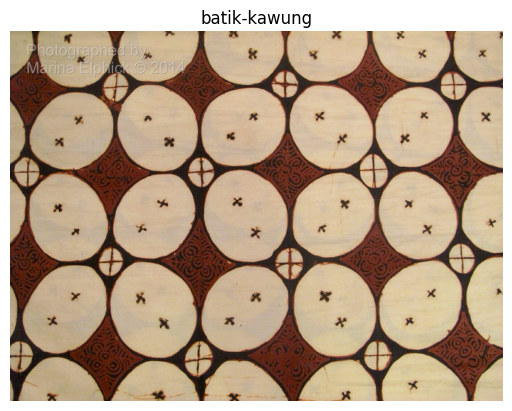

array([[[165, 152, 118],
        [162, 149, 115],
        [160, 147, 112],
        ...,
        [200, 184, 125],
        [195, 180, 111],
        [201, 187, 112]],

       [[163, 150, 116],
        [161, 148, 114],
        [162, 149, 114],
        ...,
        [197, 182, 123],
        [194, 181, 111],
        [198, 186, 110]],

       [[162, 149, 114],
        [161, 148, 113],
        [163, 150, 115],
        ...,
        [182, 172, 111],
        [184, 178, 104],
        [191, 186, 105]],

       ...,

       [[171, 155, 119],
        [173, 155, 119],
        [172, 152, 115],
        ...,
        [212, 189, 157],
        [213, 190, 158],
        [214, 191, 159]],

       [[170, 154, 120],
        [171, 153, 117],
        [170, 150, 113],
        ...,
        [208, 185, 153],
        [206, 183, 151],
        [207, 184, 152]],

       [[168, 152, 118],
        [169, 151, 115],
        [169, 149, 114],
        ...,
        [205, 182, 150],
        [202, 179, 147],
        [201, 178, 146]]

In [ ]:
#Try the function to get random image
rand_pick()

Terlihat tampilan random image yaitu batik-kawung.

In [ ]:
#Make color histogram
def hist(image):
    r = cv2.calcHist([image], [0], None, [256], [0, 256])
    g = cv2.calcHist([image], [1], None, [256], [0, 256])
    b = cv2.calcHist([image], [2], None, [256], [0, 256])

    plt.subplot(3, 1, 1)
    plt.title("Red")
    plt.hist(r, color="r")

    plt.subplot(3, 1, 2)
    plt.title("Green")
    plt.hist(g, color="g")

    plt.subplot(3, 1, 3)
    plt.title("Blue")
    plt.hist(b, color="b")

    plt.show()

    plt.title("Histogram RGB")
    plt.hist(r, color="r")
    plt.hist(g, color="g")
    plt.hist(b, color="b")
    plt.show()

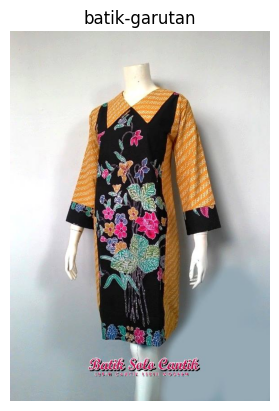

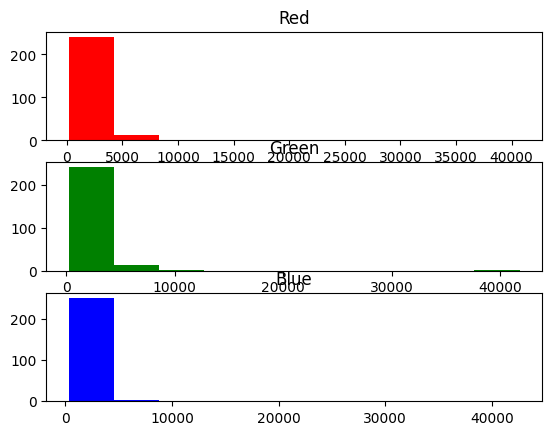

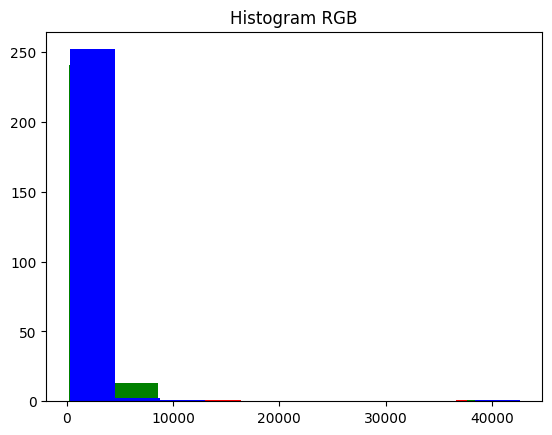

In [ ]:
#Try the function to get histogram
hist(rand_pick())

Terlihat tampilan random image yaitu batik-garutan.
Dimana persebaran datanya, warna biru lebih dominan dibandingkan hijau dan merah.

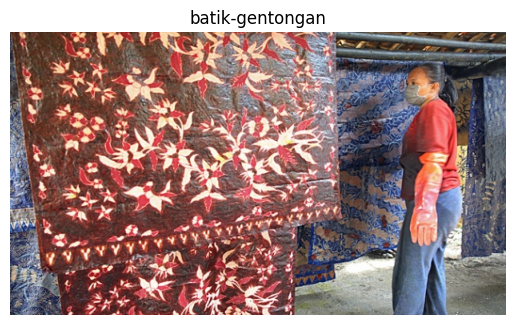

In [ ]:
#Resize the image resolution into 64x64
image = rand_pick()
image_resized = cv2.resize(image, (64, 64))

Gambar yang telah di-resize akan berubah resolusinya menjadi 64x64.

In [ ]:
!pip install split-folders

import splitfolders

In [ ]:
#Make path to the output (train, test, val)
os.makedirs('./output/train_out')
os.makedirs('./output/test_out')
os.makedirs('./output/val_out')
os.listdir('./output')

['train_out', 'val_out', 'test_out']

In [ ]:
#Split data into 3 catogeries: 80% train, 10% test, 10% val
splitfolders.ratio(data, output="output", seed=7, ratio=(.8, .1, .1))

Copying files: 245 files [00:02, 94.42 files/s] 


Terdapat total 245 file yang telah membagi data training sebesar 80%, data testing sebesar 10%, dan data validation sebesar 10%.

In [ ]:
#Define new variables for data train, test, val with ImageDataGenarator and do augmentation data
train_datagen = ImageDataGenerator(rescale = 1./255,             # rescaling nilai pixel ke rentang 0-1
                                   rotation_range = 60,          # memutar gambar hingga 20 derajat
                                   width_shift_range = 0.2,      # menggeser gambar horizontal hingga 20% dari lebar
                                   height_shift_range = 0.2,     # menggeser gambar vertikal hingga 20% dari tinggi
                                   zoom_range = 0.3,             # memperbesar atau memperkecil gambar hingga 20%
                                   vertical_flip = True,          # membalik gambar scr vertikal
                                   horizontal_flip = True,       # membalik gambar secara horizontal
                                   fill_mode = 'nearest')
train = train_datagen.flow_from_directory('/kaggle/working/output/train', target_size=(64, 64), batch_size=10, class_mode='categorical', color_mode='rgb')

test_datagen = ImageDataGenerator(rescale = 1./255)
test = test_datagen.flow_from_directory('/kaggle/working/output/test', target_size=(64, 64), batch_size=10, class_mode='categorical', color_mode='rgb')

val_datagen = ImageDataGenerator(rescale = 1./255)
val = val_datagen.flow_from_directory('/kaggle/working/output/val', target_size=(64, 64), batch_size=10, class_mode='categorical', color_mode='rgb')

Found 196 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 24 images belonging to 5 classes.


Setelah melakukan splitting, akan terbagi menjadi training data, testing data, dan validation data.

Terdapat 196 images untuk training data, 25 images untuk testing data, dan 24 images untuk validation data.

Pada bagian data training, dilakukan augmentasi data untuk memanipulasi gambar asli sehingga dapat meningkatkan jumlah dari data awal yang tersedia.

Teknik augmentasi data yang dilakukan, yaitu:

Rescaling nilai pixel untuk menjadi rentang 0 sampai 1, memutar gambar sebanyak 60 derajat, menggeser 20% gambar secara horizontal, menggeser 20% gambar secara vertikal, memperbesar gambar sampai 30%, membalik gambar secara vertikal dan horizontal, serta apabila ada pixel yang kosong akan diisi dengan pixel terdekat.

Hasil augmentasi data akan memanipulasi data sebelumnya, sehingga performa model yang dihasilkan menjadi lebih baik.

##BASELINE ARCHITECTURE
###The Architecure made based on AlexNet Architecture below
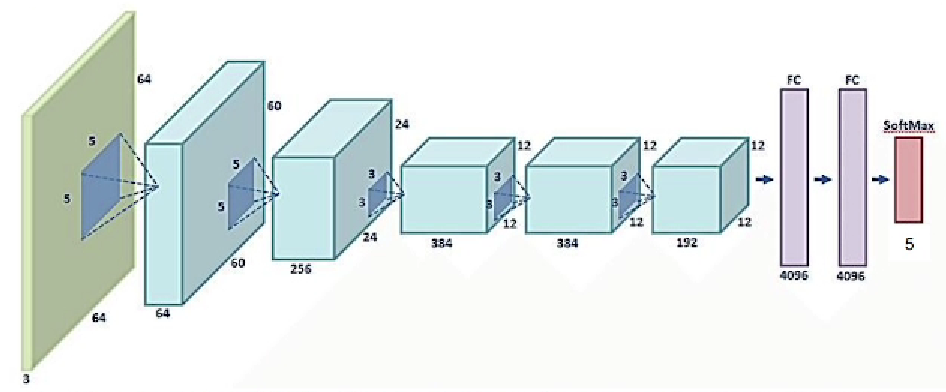

In [ ]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-4whgqizh
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-4whgqizh
  Resolved https://github.com/tensorflow/docs to commit abfbe6e54864baa38dbb985b984acd304be610d4
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=187334 sha256=1d591955f8b90bdbb10a97038e7d79f43b9d473f8bb0d92e7fb601f489e77850
  Stored in directory: /tmp/pip-ephem-wheel-cache-sjqxz8tj/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


Dalam arsitektur AlexNet pada gambar, terdapat 5 layer konvolusi. Layer pertama dengan 64 filter, layer kedua 256, layer ketiga keempat 384, dan layer kelima 192.

Setelahnya, layer di Flatten 4096 sebanyak 2 kali lalu menuju layer output menggunakan SoftMax.

In [ ]:
#Make baseline architecture with relu
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=(5,5), strides=(1, 1), activation='relu', input_shape=(64, 64, 3), padding='valid'))
model.add(MaxPooling2D(pool_size=(14, 14), strides=(2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.Conv2D(192, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

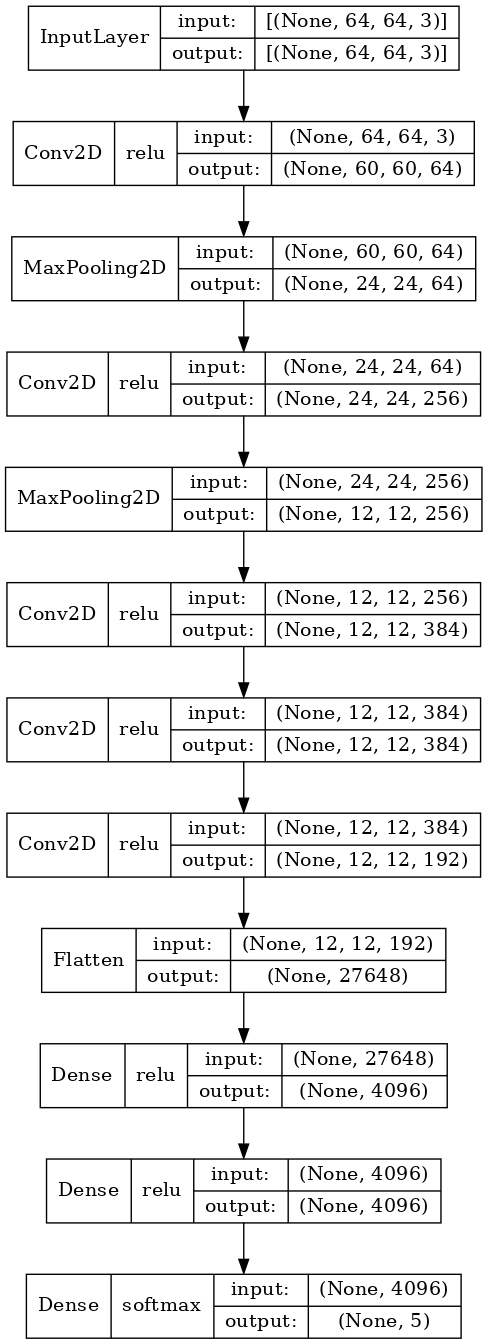

In [ ]:
tf.keras.utils.plot_model(model,
                         to_file = 'model.png',
                         show_shapes = True,
                         show_dtype = False,
                         show_layer_names = False,
                         show_layer_activations = True,
                         dpi = 100)

In [ ]:
history = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
20/20 [==============================] - 11s 154ms/step - loss: 26.9219 - accuracy: 0.1939 - val_loss: 1.6100 - val_accuracy: 0.2083
Epoch 2/50
20/20 [==============================] - 3s 126ms/step - loss: 1.6133 - accuracy: 0.1837 - val_loss: 1.6088 - val_accuracy: 0.2083
Epoch 3/50
20/20 [==============================] - 2s 114ms/step - loss: 1.6111 - accuracy: 0.1786 - val_loss: 1.6082 - val_accuracy: 0.2083
Epoch 4/50
20/20 [==============================] - 3s 127ms/step - loss: 1.6107 - accuracy: 0.1224 - val_loss: 1.6078 - val_accuracy: 0.2083
Epoch 5/50
20/20 [==============================] - 2s 117ms/step - loss: 1.6103 - accuracy: 0.1684 - val_loss: 1.6079 - val_accuracy: 0.2083
Epoch 6/50
20/20 [==============================] - 2s 124ms/step - loss: 1.6296 - accuracy: 0.1990 - val_loss: 1.6075 - val_accuracy: 0.2083
Epoch 7/50
20/20 [==============================] - 2s 124ms/step - loss: 1.6114 - accuracy: 0.1837 - val_loss: 1.6074 - val_accuracy: 0.2083
Epoc

In [ ]:
loss_test1, acc_test1 = model.evaluate(test)

print("Model 1")
print("Loss of Testing Model 1: ", loss_test1)
print("Accuracy of Testing Model 1: ", acc_test1)

3/3 [==============================] - 0s 40ms/step - loss: 1.5511 - accuracy: 0.3200
Model 1
Loss of Testing Model 1:  1.5511397123336792
Accuracy of Testing Model 1:  0.3199999928474426


Hasil akhir model 1 sesuai yang dibangun sesuai baseline arsitektur pada soal dengan epochs sebesar 50 menghasilkan model dengan akurasi yang kurang bagus.

Model awal memiliki akurasi sekitar 16% dengan tingkat loss sebesar 1.5.

Maka, selanjutnya akan dilakukan modifikasi arsitektur agar hasil akurasi lebih tinggi.

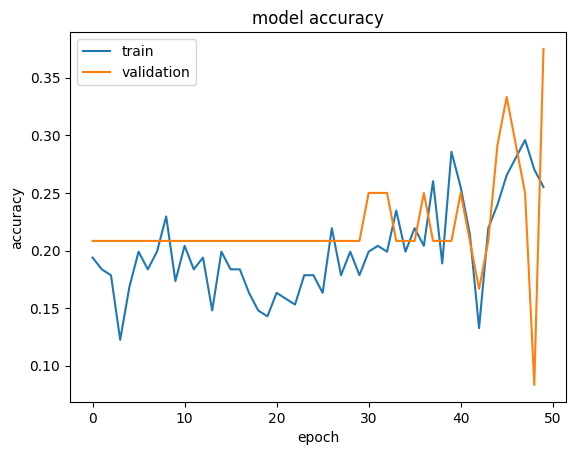

In [ ]:
#Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

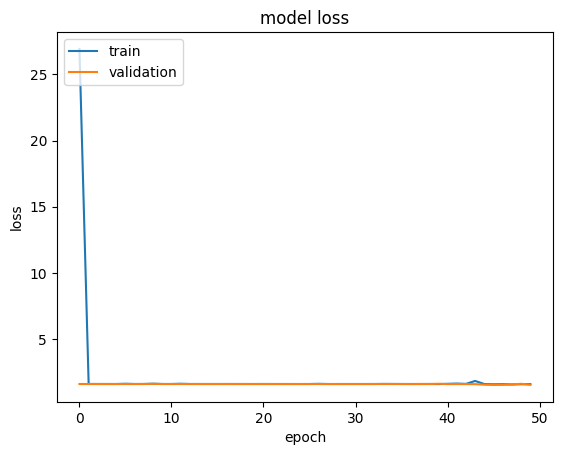

In [ ]:
#Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##MODIFIED ARCHITECTURE

In [ ]:
#Make modified model
model2 = Sequential()
model2.add(layers.Conv2D(64, kernel_size=(5,5), strides=(1, 1), activation='relu', input_shape=(64, 64, 3), padding='valid'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(14, 14), strides=(2, 2)))
model2.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(layers.Conv2D(192, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train, epochs=120, validation_data=val)

Epoch 1/120
20/20 [==============================] - 5s 138ms/step - loss: 2.6288 - accuracy: 0.2194 - val_loss: 1.6087 - val_accuracy: 0.2083
Epoch 2/120
20/20 [==============================] - 2s 122ms/step - loss: 2.5227 - accuracy: 0.2449 - val_loss: 1.6193 - val_accuracy: 0.2083
Epoch 3/120
20/20 [==============================] - 2s 124ms/step - loss: 2.3018 - accuracy: 0.2449 - val_loss: 1.6230 - val_accuracy: 0.2083
Epoch 4/120
20/20 [==============================] - 2s 123ms/step - loss: 2.2047 - accuracy: 0.3214 - val_loss: 1.6355 - val_accuracy: 0.2083
Epoch 5/120
20/20 [==============================] - 3s 127ms/step - loss: 2.3287 - accuracy: 0.2347 - val_loss: 1.6490 - val_accuracy: 0.2083
Epoch 6/120
20/20 [==============================] - 3s 126ms/step - loss: 2.1097 - accuracy: 0.2806 - val_loss: 1.6506 - val_accuracy: 0.2083
Epoch 7/120
20/20 [==============================] - 2s 123ms/step - loss: 2.2362 - accuracy: 0.2245 - val_loss: 1.6796 - val_accuracy: 0.2083

In [ ]:
loss_test2, acc_test2 = model2.evaluate(test)

print("Model 2")
print("Loss of Testing Model 2: ", loss_test2)
print("Accuracy of Testing Model 2: ", acc_test2)

3/3 [==============================] - 0s 40ms/step - loss: 3.6318 - accuracy: 0.3200
Model 2
Loss of Testing Model 2:  3.6318399906158447
Accuracy of Testing Model 2:  0.3199999928474426


Model yang telah dimodifikasi dengan epochs sebesar 120, menghasilkan model yang cukup bagus.
Pada tahap memodifikasi arsiktektur, ada beberapa hal yang ditambahkan, yaitu:
1. Dropout sebesar 0.5, dropout akan drop neuron secara acak selama training data, sehingga dapat mencegah overfitting dan meningkatkan performa model
2. Batch Normalization, akan menormalkan input dalam setiap layer, sehingga komputasi lebih stabil dan cepat
3. Optimizer, dalam model ini ditambahkan optimizer SGD yang berguna meminimalkan loss function dan meningkatkan akurasi model
3. Learning Rate, digunakan learning rate sebesar 0.001. Learning rate mengontrol seberapa cepat weight diperbarui, maka dipilih lr sebesar 0.001 yang meningkatkan performa model

Tingkat akurasi yang dihasilkan sekitar 43% untuk data testing dengan tingkat loss sebesar 4.1. Namun, tingkat loss masih cukup tinggi.

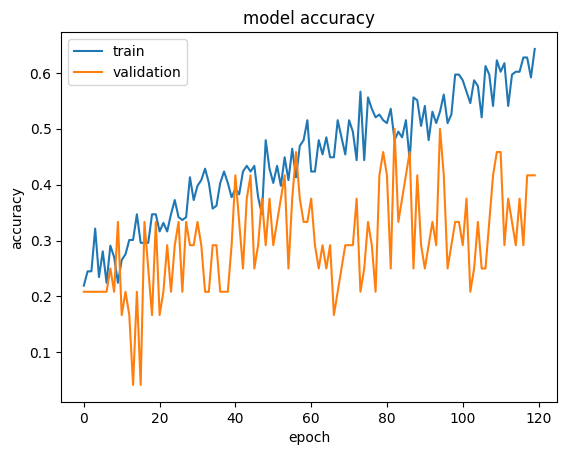

In [ ]:
#Plot Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

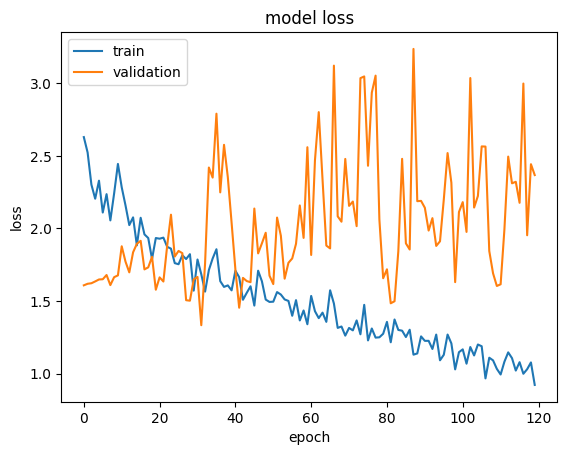

In [ ]:
#Plot Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##MODEL EVALUATION

Model yang dipilih adalah model 2, maka akan dilakukan evaluasi terhadap model 2.

In [ ]:
loss, acc = model2.evaluate(test, verbose=0)
print("Testing Accuracy: ", acc)
print("Testing Loss: ", loss)

Testing Accuracy:  0.3199999928474426
Testing Loss:  3.6318399906158447


Untuk evaluasi performa model menggunakan data testing, didapatkan hasil akhir akurasi sebesar 43% dengan tingkat loss sebesar 4.1. Dimana tingkat akurasi yang didapatkan masih kurang baik, namun lebih baik dibandingkan model pertama.